In [1]:
#final
from scipy.optimize import curve_fit #to the fit
import numpy as np #for math and algebra
np.set_printoptions(threshold=np.inf) #modify print option: i want to print arrays to see them entirely 
import matplotlib.pyplot as plt #for plotting
%matplotlib inline
# i set the font size for you to see well on figures
font = {'weight' : 'normal', #'family' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

#import the experiment file

melting=np.loadtxt('melting_12AB_0_02gl_450mM_NaCl.txt')

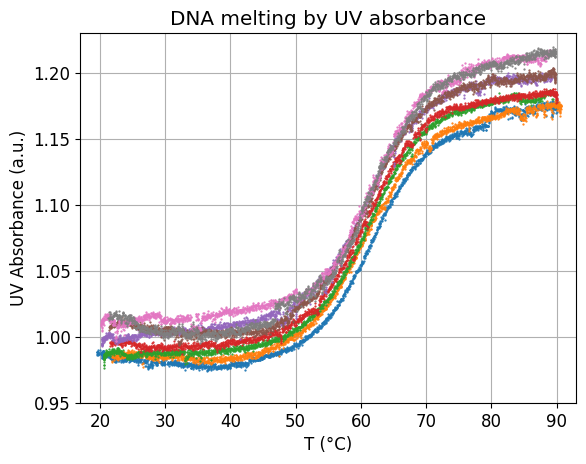

In [37]:
#1st clumns --> T
#2nd --> A
#24 colonne in tutto

for i in (0,3,6,9,12,15,18, 21):
    T = melting[:,i]
    A = melting[:, i+1]
    plt.plot(T,A, 'o', markersize=0.6)
    plt.grid(True)
    plt.xlim((17, 93))
    plt.ylim((0.95, 1.23))
    plt.xlabel('T (°C)')
    plt.ylabel('UV Absorbance (a.u.)')
    plt.title('DNA melting by UV absorbance')
plt.show()



In [3]:
cond_LT= (T>26) & (T<36)
cond_HT= (T>75) & (T<85)

lt_array = []
ht_array= []

for i in (0,3,6,9, 12, 15, 18, 21):
    T = melting[:,i]
    A = melting[:, i+1]

    lt_p=np.polyfit(T[cond_LT],A[cond_LT],1)
    ht_p=np.polyfit(T[cond_HT],A[cond_HT],1)

    lt_array.append(lt_p)
    ht_array.append(ht_p)

print ("lt_array :", lt_array)
print ("ht_array :", ht_array)
#print (lt_array[1][1])

lt_array : [array([-4.46023051e-04,  9.93391827e-01]), array([-3.00770357e-04,  9.93766771e-01]), array([1.82809630e-04, 9.81902054e-01]), array([1.87005718e-04, 9.86612468e-01]), array([4.93477133e-04, 9.88264504e-01]), array([-6.04524304e-04,  1.02267293e+00]), array([1.59010204e-04, 1.00884140e+00]), array([-3.73210540e-04,  1.01525192e+00])]
ht_array : [array([0.00252716, 0.9635803 ]), array([0.00110807, 1.07738743]), array([0.00144399, 1.06204671]), array([9.06738879e-04, 1.10611436e+00]), array([0.00131945, 1.08749672]), array([7.66439576e-04, 1.13119201e+00]), array([0.00213031, 1.03708244]), array([0.00129579, 1.10092834])]


In [9]:
rho_array = []
for i in (0,1,2,3,4,5, 6,7):
    rho= (A - (lt_array[i][0]*T[:]+lt_array[i][1]))/  ((ht_array[i][0]*T[:]+ht_array[i][1]) - (lt_array[i][0]*T[:]+lt_array[i][1]))
    rho_array.append(rho)

#compute <rho f> on all set of measurments 
rho_mean = np.mean(rho_array, axis=1)
print("Mean rho values for every set:", rho_mean)
mean_rho_mean = np.mean( rho_mean)
print ("<rho f> on all set of measurments: " , "%.0{}f".format(3)% mean_rho_mean)

Mean rho values for every set: [ 1.93010057  0.19768212  0.14544379  0.24946961  0.11130586  0.14795442
 -0.86045774  0.03914371]
<rho f> on all set of measurments:  0.245


In [10]:
'''
for i in rho_array:
    T_cond= (T>52) & (T< 70)
    print (T[T_cond], rho_array[i][T_cond]
    
    rho_fit=np.polyfit(T[T_cond], rho_array[i][T_cond],1)
    plt.grid()

    plt.plot(T[:],rho_array[:], 'o', markersize=1.5, alpha = 0.5)    
    plt.plot(T[:], rho_fit[0]*T[:]+ rho_fit[1], markersize=1.5, color="red", linestyle= "dashed")

    plt.ylim((-0.1, 1.2))
    plt.xlabel('T (°C)')
    plt.ylabel('$\u03C1_f$')
    plt.title('DNA Melting Curve')
'''

'\nfor i in rho_array:\n    T_cond= (T>52) & (T< 70)\n    print (T[T_cond], rho_array[i][T_cond]\n    \n    rho_fit=np.polyfit(T[T_cond], rho_array[i][T_cond],1)\n    plt.grid()\n\n    plt.plot(T[:],rho_array[:], \'o\', markersize=1.5, alpha = 0.5)    \n    plt.plot(T[:], rho_fit[0]*T[:]+ rho_fit[1], markersize=1.5, color="red", linestyle= "dashed")\n\n    plt.ylim((-0.1, 1.2))\n    plt.xlabel(\'T (°C)\')\n    plt.ylabel(\'$ρ_f$\')\n    plt.title(\'DNA Melting Curve\')\n'

In [6]:
def Tm_comp(T, curve, c_min, c_max):
    
    cond_c= (curve > c_min) & (curve < c_max)
    Tm = np.mean(T[cond_c])
    return(Tm)

def Tm_asimmetrycal_distribution (T,curve, c_min, c_max):
    cond_c= (curve > c_min) & (curve < c_max)
    y = np.argmin(np.abs(curve - 0.5)) 
    T_melt = T[y]
    return (T_melt)

Tm_array=[]
for array in rho_array:
    Tm_exp=Tm_comp(T, array, 0.48, 0.52)
    Tm_array.append(Tm_exp)

    T_melt= Tm_asimmetrycal_distribution (T, array, 0.2, 0.8)
    Tm_array.append(T_melt)

print ("Experimental melting temperature :" , Tm_array) #for each set computeted with 2 different methods

Experimental melting temperature : [45.17407407407408, 52.2, 56.96666666666666, 56.4, 58.236, 57.9, 59.26470588235294, 59.4, 59.94, 59.9, 59.4625, 59.8, 59.916666666666664, 59.9, 59.68888888888888, 59.6]


In [8]:
#print (Tm_array[1])
Tm_mean = np.mean([Tm_array[1], Tm_array[3],Tm_array[5], Tm_array[7], Tm_array[9], Tm_array[11], Tm_array[13], Tm_array[15]])
print ("<Tm>:" ,"%0.{}f".format(3) % Tm_mean, "°C")

Tm_std= np.std([Tm_array[1], Tm_array[3], Tm_array[5], Tm_array[7], Tm_array[9], Tm_array[11], Tm_array[13], Tm_array[15]])
print ("Standard deviation of T melting set: " , "%0.{}f".format(3) % Tm_std)

N= (len(Tm_array)/2)
SEM = Tm_std/ np.sqrt(N)
print ("SEM:" , "%0.{}f".format(3) %SEM)

<Tm>: 58.137 °C
Standard deviation of T melting set:  2.526
SEM: 0.893


In [12]:
#compute theoretical prediction of rho #già fatto
#Optional: Fitting < 𝜌𝑓 > (or all the 𝜌𝑓(𝑖)) with the theoretical expression to obtain ∆𝐻 and
#∆𝑆 (suggestion: use “curve_fit” from scipy.optimize )

mean_th_rho = 0.44297368977572
mean_exp_rho = rho_mean

R=1.987; #costante dei gas in cal K^-1 mol^-1
Tk = 273.15;
DH=-90.4000*1000; # cal / mol
DS0=-244.8000; # cal / (K mol)
cNa=0.45; # M
f_CG= 7/12
DS = DS0 + DH*((4.29*f_CG-3.95)*1e-5*np.log(cNa) +9.4*1e-6*(np.log(cNa))**2 )
MW=3640; #g/mol
c_gl=0.04; #g/l
c_t= c_gl/MW  #M/l #[single strand]

T_theo=np.linspace(17, 92, 2067)
T_th= T_theo + Tk
DG= DH - DS*T_th

T_array = []
for i in (0,3,6, 9,12,15,18,21):
    T = melting [:,i]
    T_array.append(T)
    
def th_rho(T_th, DH, DS):
    R = 8.314  
    c_t = 0.04/3640
    DG = DH - DS * T_th
    return 2 / (1 + np.sqrt(1 + 2 * c_t * np.exp(-DG / (R * T_th))))

#print (len(T_array), len(rho_array))
#for i in range (0,4):
    #print (len(T_array[i]))

tot_T_array = np.concatenate(T_array)
#print("Array unico:", tot_T_array)
tot_rho_array = np.concatenate (rho_array)
#tot_T_array = tot_T_array.flatten()
#tot_rho_array = tot_rho_array.flatten()

print (len( tot_T_array), len( tot_rho_array))
print(tot_T_array.dtype, tot_rho_array.dtype)

16536 16536
float64 float64


In [17]:
for i in (1,2,3,4,5,6,7):
    popt, pcov = curve_fit(th_rho, T_array[i]+ Tk, rho_array[i])
    DH_opt, DS_opt = popt
    covariance_matrix = pcov
    std_errors = np.sqrt(np.diag(covariance_matrix))
    
    print("ΔH:", DH_opt)
    print("ΔS:", DS_opt)
    print("σ_ΔH:", std_errors[0])
    print("σ_ΔS:", std_errors[1])


ΔH: -239757.8737680384
ΔS: -625.2415009479889
σ_ΔH: 93752.0457588902
σ_ΔS: 285.5963490577998
ΔH: -279959.5860428466
ΔS: -749.3032513263058
σ_ΔH: 120159.35091393653
σ_ΔS: 366.76993329179885
ΔH: -326447.2161504941
ΔS: -878.3866735597762
σ_ΔH: 101260.91984104142
σ_ΔS: 305.10936038636163
ΔH: -405395.1469009758
ΔS: -1118.8164157447595
σ_ΔH: 169616.87107991095
σ_ΔS: 512.2100334935582
ΔH: -300643.71361279377
ΔS: -799.5734807565088
σ_ΔH: 102377.96768971335
σ_ΔS: 308.1224452236537
ΔH: -411944.8575163874
ΔS: -1139.3841532864192
σ_ΔH: 622937.181594071
σ_ΔS: 1882.0877652390814
ΔH: -289347.45945290127
ΔS: -764.1683056865373
σ_ΔH: 121370.78417927003
σ_ΔS: 364.6988604776872


C:\Users\bulga\AppData\Local\Temp\ipykernel_8040\1655629507.py:32: RuntimeWarning: divide by zero encountered in divide
  return 2 / (1 + np.sqrt(1 + 2 * c_t * np.exp(-DG / (R * T_th))))


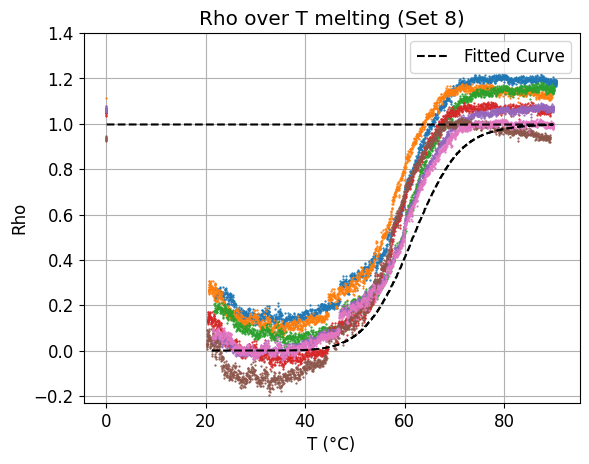

In [32]:
for i in (1, 2, 3,4,5,6,7):
    # Fit the model to the data
    popt, pcov = curve_fit(th_rho, T_array[i], rho_array[i])
    DH_opt, DS_opt = popt
    covariance_matrix = pcov
    std_errors = np.sqrt(np.diag(covariance_matrix))
    
    plt.plot(T_array[i], rho_array[i], 'o', markersize=0.6)
    
    plt.grid(True)
    plt.xlabel('T (°C)')
    plt.ylabel('Rho')
    plt.title(f'Rho over T melting (Set {i+1})')
    plt.ylim((-0.23, 1.4))
    
plt.plot(T_array[i], th_rho(T_theo, *popt), color='black', linestyle= "dashed", lw= 1.5 , label='Fitted Curve')
plt.legend()

plt.show()


In [ ]:
  print(f"Set {i+1}:")
    print("ΔH:","%0.2f J" % DH_opt)
    print("ΔS:", "%0.2f J" % DS_opt)
    print("σ_ΔH:","%0.2f J" %std_errors[0])
    print("σ_ΔS:"," %0.2f J" %std_errors[1])